# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
from helper_functions import *

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
X = df.drop('Loan_ID', axis=1).copy()
y = X.pop('Loan_Status')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [8]:
# Define Plot Styles

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [9]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='loan_data.html')

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [12]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



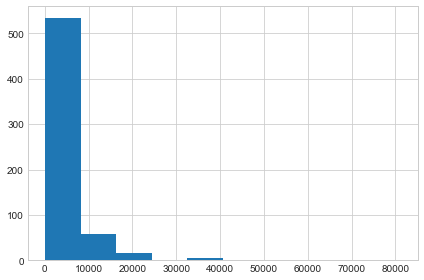

In [13]:
plt.hist(df.ApplicantIncome);


Look at box plots to understand the distributions. 

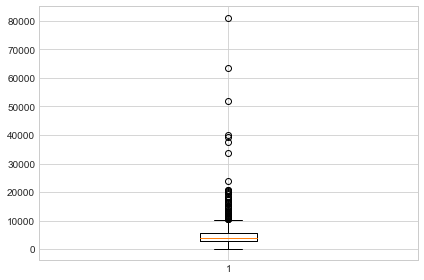

In [14]:
plt.boxplot(df.ApplicantIncome);

Look at the distribution of income segregated  by `Education`

In [15]:
df.groupby('Education').ApplicantIncome.mean()

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

In [16]:
df.groupby('Education').CoapplicantIncome.mean()

Education
Graduate        1717.474833
Not Graduate    1276.544776
Name: CoapplicantIncome, dtype: float64

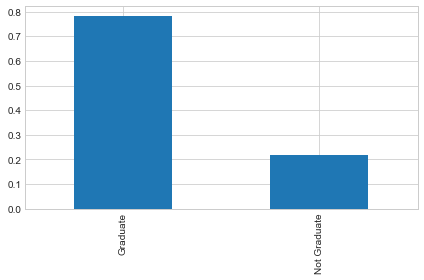

In [17]:
df['Education'].value_counts(normalize=True).plot.bar();

Look at the histogram and boxplot of LoanAmount

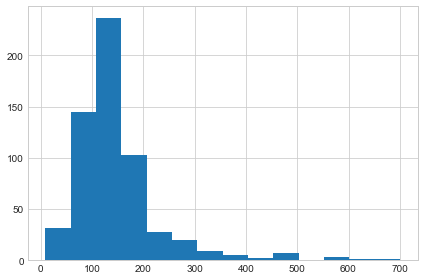

In [18]:
plt.hist(df.LoanAmount, bins=14);

/Users/daylin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


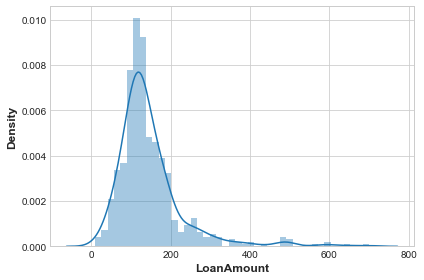

In [19]:
sns.distplot(df['LoanAmount']);

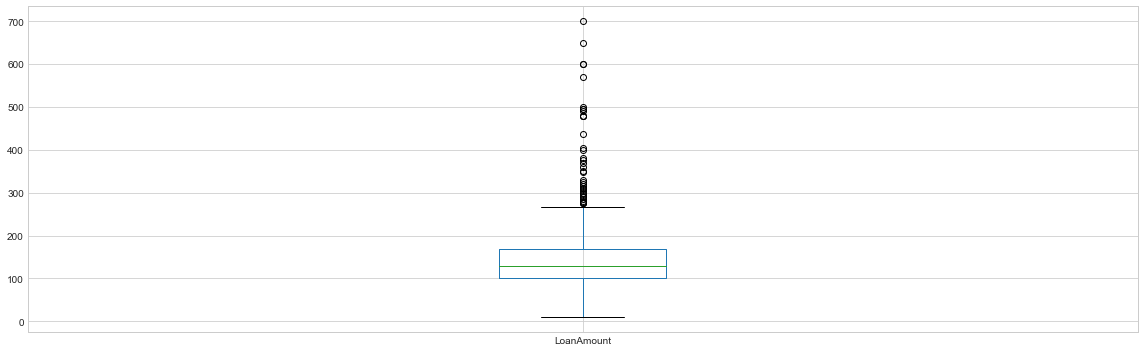

In [20]:
# use NumPy box plot
df['LoanAmount'].plot.box(figsize=(16,5));

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

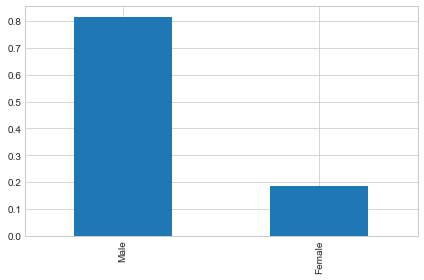

In [21]:
df['Gender'].value_counts(normalize=True).plot.bar();

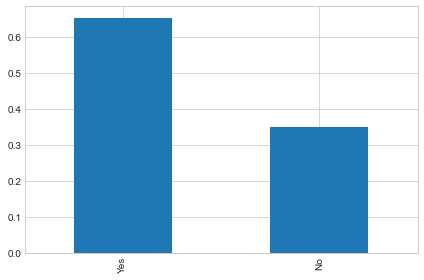

In [22]:
df['Married'].value_counts(normalize=True).plot.bar();

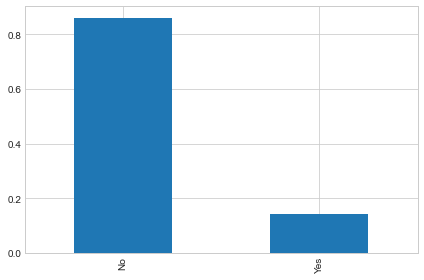

In [23]:
df['Self_Employed'].value_counts(normalize=True).plot.bar();

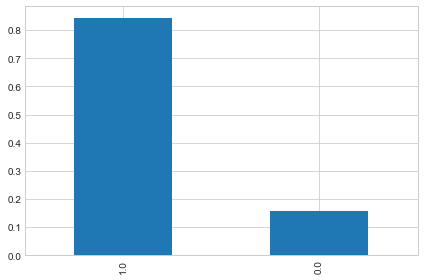

In [24]:
df['Credit_History'].value_counts(normalize=True).plot.bar();

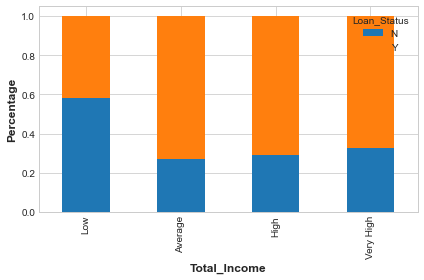

In [25]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
bins=[0, 2500, 4000, 6000, 81000]
group=['Low', 'Average', 'High', 'Very High']
df['Total_Income_bin'] = pd.cut(df['Total_Income'], bins, labels=group)
Total_Income_bin=pd.crosstab(df['Total_Income_bin'], df['Loan_Status'])

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

In [26]:
# low income is leading to a lot less approvals

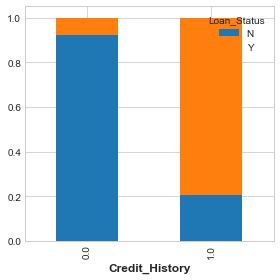

In [27]:
Credit_History = pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [28]:
# very likely to get approved if you already have credit, and vice versa
# this could be a problem... could just learn from this one feature and predict entirely on this.

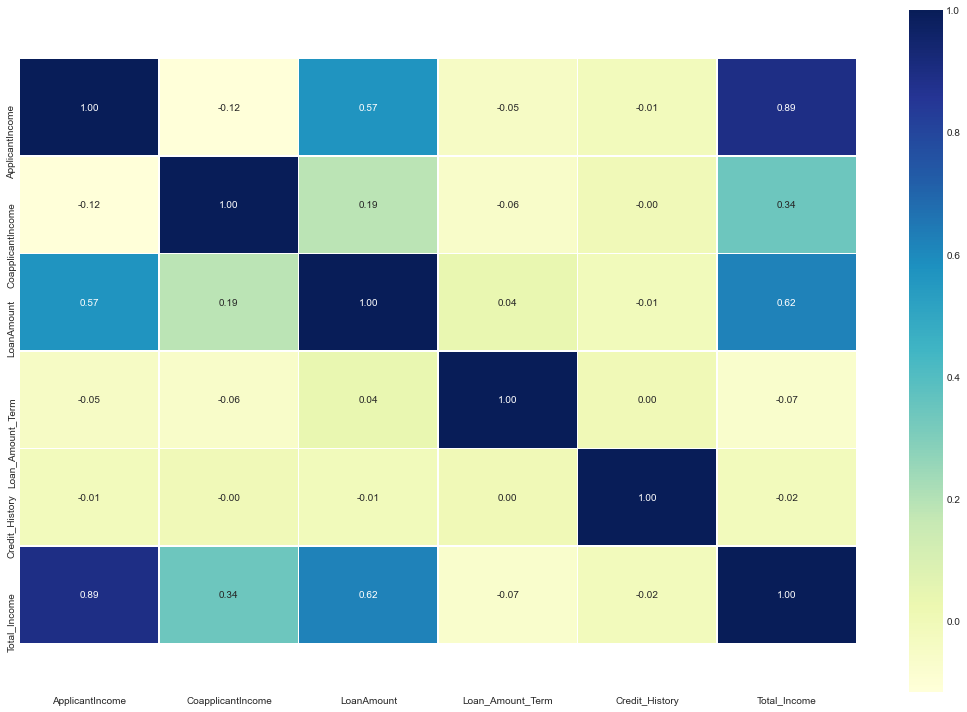

In [29]:
corr_matrix(df)

In [30]:
# Correlations between ApplicantIncome (& CoapplicantIncome) -- LoanAmount
# nothing else is really interesting

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

#### Baseline Model

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [32]:
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [33]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                                        ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ])
    
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
base_model = LogisticRegression()

models_to_test = [SVC(), KNeighborsClassifier(), GaussianNB(), LogisticRegression()]

params = {'model': models_to_test}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', base_model)])

In [34]:
# Display HTML representation in a jupyter context for Pipeline
from sklearn import set_config
set_config(display='diagram')

In [35]:
grid_search = GridSearchCV(pipeline, params, verbose=3)

In [36]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] model=SVC() .....................................................
[CV] ......................... model=SVC(), score=0.778, total=   0.0s
[CV] model=SVC() .....................................................
[CV] ......................... model=SVC(), score=0.816, total=   0.0s
[CV] model=SVC() .....................................................
[CV] ......................... model=SVC(), score=0.755, total=   0.0s
[CV] model=SVC() .....................................................
[CV] ......................... model=SVC(), score=0.878, total=   0.0s
[CV] model=SVC() .....................................................
[CV] ......................... model=SVC(), score=0.806, total=   0.0s
[CV] model=KNeighborsClassifier() ....................................
[CV] ........ model=KNeighborsClassifier(), score=0.768, total=   0.0s
[CV] model=KNeighborsClassifier() ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ model=KNeighborsClassifier(), score=0.816, total=   0.0s
[CV] model=KNeighborsClassifier() ....................................
[CV] ........ model=KNeighborsClassifier(), score=0.724, total=   0.0s
[CV] model=KNeighborsClassifier() ....................................
[CV] ........ model=KNeighborsClassifier(), score=0.867, total=   0.0s
[CV] model=KNeighborsClassifier() ....................................
[CV] ........ model=KNeighborsClassifier(), score=0.765, total=   0.0s
[CV] model=GaussianNB() ..............................................
[CV] .................. model=GaussianNB(), score=0.778, total=   0.0s
[CV] model=GaussianNB() ..............................................
[CV] .................. model=GaussianNB(), score=0.786, total=   0.0s
[CV] model=GaussianNB() ..............................................
[CV] .................. model=GaussianNB(), score=0.755, total=   0.0s
[CV] model=GaussianNB() ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'Credit_History']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area'])])),
                                       ('model', LogisticRegression())]),
             param_grid={'model': [SVC(), KNeighborsClassifier(), GaussianNB(),
                                   LogisticRegression()]},
             verbose=3)

In [37]:
best_hyperparams = grid_search.best_params_
best_acc = grid_search.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8211382113821138
Achieved with hyperparameters: {'model': SVC()}


In [38]:
y_pred = grid_search.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      0.42      0.59        38
           Y       0.79      1.00      0.89        85

    accuracy                           0.82       123
   macro avg       0.90      0.71      0.74       123
weighted avg       0.86      0.82      0.79       123



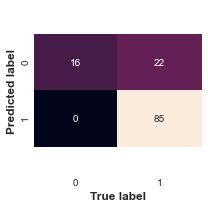

In [40]:
# from helper_functions
plot_conf_mat(y_test, y_pred)

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [ ]:
# From results above, use SVC()
# pipe with same preprocessing, but only one model

In [41]:
model = SVC()

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', model)])

In [42]:
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

In [112]:
pred[0]

'Y'

In [44]:
acc = pipe.score(X_test, y_test)
acc

0.8211382113821138

In [47]:
# pickle model

In [48]:
import pickle

In [49]:
pickle.dump(pipe, open('loan_prediction.pickle', 'wb'))

In [106]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
602,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban
58,Male,Yes,1,Graduate,No,8080,2250.0,180.0,360.0,1.0,Urban
263,Female,No,0,Graduate,No,7200,0.0,120.0,360.0,1.0,Rural
204,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
322,Male,Yes,2,Not Graduate,No,3601,1590.0,NaN,360.0,1.0,Rural
254,Male,No,0,Graduate,Yes,16250,0.0,192.0,360.0,0.0,Urban
241,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban
470,Male,Yes,1,Graduate,Yes,3450,2079.0,162.0,360.0,1.0,Semiurban


In [109]:
json_data

[{'Gender': 'Female',
  'Married': 'No',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'ApplicantIncome': 3000,
  'CoapplicantIncome': 0.0,
  'LoanAmount': 120.0,
  'Loan_Amount_Term': 360.0,
  'Credit_History': 1.0,
  'Property_Area': 'Urban'}]

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [50]:
import json
import requests

### App running locally

In [79]:
# grab part of test set to send to app model
# use json.loads to format as list of dictionaries
dataset1 = json.loads(X_test.iloc[20:25, :].to_json(orient='records'))
dataset2 = json.loads(X_test.iloc[80:85, :].to_json(orient='records'))
dataset3 = json.loads(X_test.iloc[92:97, :].to_json(orient='records'))

In [80]:
type(dataset1)

list

In [81]:
# send request to app for predictions
URL = "http://127.0.0.1:5000/approval"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = dataset1)

<Response [200]>

In [82]:
# prediction result
print(r.json())

['Y', 'Y', 'Y', 'Y', 'Y']


In [83]:
r2 = requests.post(url = URL, json = dataset2)

In [84]:
print(r2.json())

['Y', 'N', 'Y', 'Y', 'Y']


In [85]:
r3 = requests.post(url = URL, json = dataset2)
print(r3.json())

['Y', 'N', 'Y', 'Y', 'Y']


### App running on EC2

In [88]:
# send request to app for predictions
# this DNS url will change with EC2 instance
EC2_URL = "http://ec2-18-216-141-182.us-east-2.compute.amazonaws.com:5000/approval"
# sending get request and saving the response as response object 
res = requests.post(url = EC2_URL, json = dataset1)

In [89]:
print(res.json())

['Y', 'Y', 'Y', 'Y', 'Y']


In [91]:
res2 = requests.post(url = EC2_URL, json = dataset2)
print(res2.json())

['Y', 'N', 'Y', 'Y', 'Y']


In [98]:
res3 = requests.post(url = EC2_URL, json = dataset3)
print(res3.json())

['Y', 'Y', 'Y', 'Y', 'Y']


In [102]:
json_data = [{'Gender': 'Female',
 'Married': 'No',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 3000,
 'CoapplicantIncome': 0.0,
 'LoanAmount': 120.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'}]

In [95]:
# Data Format Example
# {'Gender': 'Female',
#   'Married': 'Yes',
#   'Dependents': '0',
#   'Education': 'Not Graduate',
#   'Self_Employed': 'Yes',
#   'ApplicantIncome': 7142,
#   'CoapplicantIncome': 0.0,
#   'LoanAmount': 138.0,
#   'Loan_Amount_Term': 360.0,
#   'Credit_History': 1.0,
#   'Property_Area': 'Rural'}

In [99]:
dataset_single = json.loads(X_test.iloc[:1, :].to_json(orient='records'))

In [104]:
type(dataset_single)

list

In [101]:
response = requests.post(url = EC2_URL, json = dataset_single)
print(response.json())

['Y']


In [105]:
response2 = requests.post(url = EC2_URL, json = json_data)
print(response.json())

['Y']
